# 📊 Exploratory Data Analysis (EDA) for THYAO Dataset

This notebook provides a comprehensive exploratory data analysis (EDA) of the THYAO dataset using Python's data science libraries: `pandas`, `matplotlib`, and `seaborn`.

## Objectives
- Understand the structure and summary statistics of the dataset
- Visualize trends and distributions of key features
- Analyze correlations between numerical variables
- Identify outliers and patterns


## 1. Import Libraries & Load Data

In [3]:
# Import essential libraries for data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set global visualization styles
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (12, 6)

# Load the dataset
df = pd.read_csv(r"C:\Users\ozang\OneDrive\Masaüstü\THYAO_Project\data\THYAO_Regression_Data.csv")

# Preview the first few rows
df.head()

,Month,Total Current Assets,Total Non-Current Assets,Total Current Liabilities,Total Long-term Liabilities,Total Equity,P/E,SMA,RSI,Highest Price
0,2023/8,2.210000e+11,6.330000e+11,2.490000e+11,3.360000e+11,2.690000e+11,6.24,184.14,46.65,269.8
1,2023/7,2.210000e+11,6.330000e+11,2.490000e+11,3.360000e+11,2.690000e+11,6.52,158.51,37.70,237.6
2,2023/6,2.210000e+11,6.330000e+11,2.490000e+11,3.360000e+11,2.690000e+11,5.39,110.67,22.25,193.7
3,2023/5,1.520000e+11,4.630000e+11,1.730000e+11,2.500000e+11,1.910000e+11,4.00,90.71,44.79,149.4
4,2023/4,1.520000e+11,4.630000e+11,1.730000e+11,2.500000e+11,1.910000e+11,3.72,83.31,39.50,138.2


## 2. Dataset Structure & Summary

In [4]:
# Display info about the DataFrame (column types, non-null counts, memory usage)
df.info()

# Show basic statistics for numerical columns
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Month                        87 non-null     object 
 1   Total Current Assets         87 non-null     float64
 2   Total Non-Current Assets     87 non-null     float64
 3   Total Current Liabilities    87 non-null     float64
 4   Total Long-term Liabilities  87 non-null     float64
 5   Total Equity                 87 non-null     float64
 6   P/E                          87 non-null     float64
 7   SMA                          87 non-null     float64
 8   RSI                          87 non-null     float64
 9   Highest Price                87 non-null     float64
dtypes: float64(9), object(1)
memory usage: 6.9+ KB


,count,mean,std,min,25%,50%,75%,max
Total Current Assets,87.0,4.954610e+10,5.189297e+10,9.429000e+09,1.545500e+10,2.833900e+10,4.748200e+10,2.210000e+11
Total Non-Current Assets,87.0,1.688490e+11,1.455108e+11,4.298700e+10,5.790200e+10,1.190000e+11,1.870000e+11,6.330000e+11
Total Current Liabilities,87.0,6.170359e+10,5.902926e+10,1.220100e+10,1.945300e+10,3.633100e+10,6.285400e+10,2.490000e+11
Total Long-term Liabilities,87.0,1.030228e+11,8.156471e+10,2.736300e+10,3.360200e+10,7.065900e+10,1.210000e+11,3.360000e+11
Total Equity,87.0,6.372976e+10,6.467183e+10,1.285200e+10,2.017100e+10,3.951100e+10,5.760800e+10,2.690000e+11
P/E,87.0,1.811069e+01,3.261508e+01,2.760000e+00,5.065000e+00,6.240000e+00,1.059000e+01,1.779300e+02
SMA,87.0,2.285931e+01,3.496116e+01,3.130000e+00,7.080000e+00,9.300000e+00,1.293000e+01,1.841400e+02
RSI,87.0,4.459575e+01,1.721304e+01,9.460000e+00,3.166000e+01,4.479000e+01,5.802500e+01,7.998000e+01
Highest Price,87.0,3.603966e+01,5.382475e+01,5.090000e+00,1.229000e+01,1.465000e+01,1.984000e+01,2.698000e+02


## 3. Data Preprocessing

In [5]:
# Convert 'Month' column to datetime for time series analysis
df["Month"] = pd.to_datetime(df["Month"], format="%Y/%m")

## 4. Trend Analysis: Highest Price Over Time

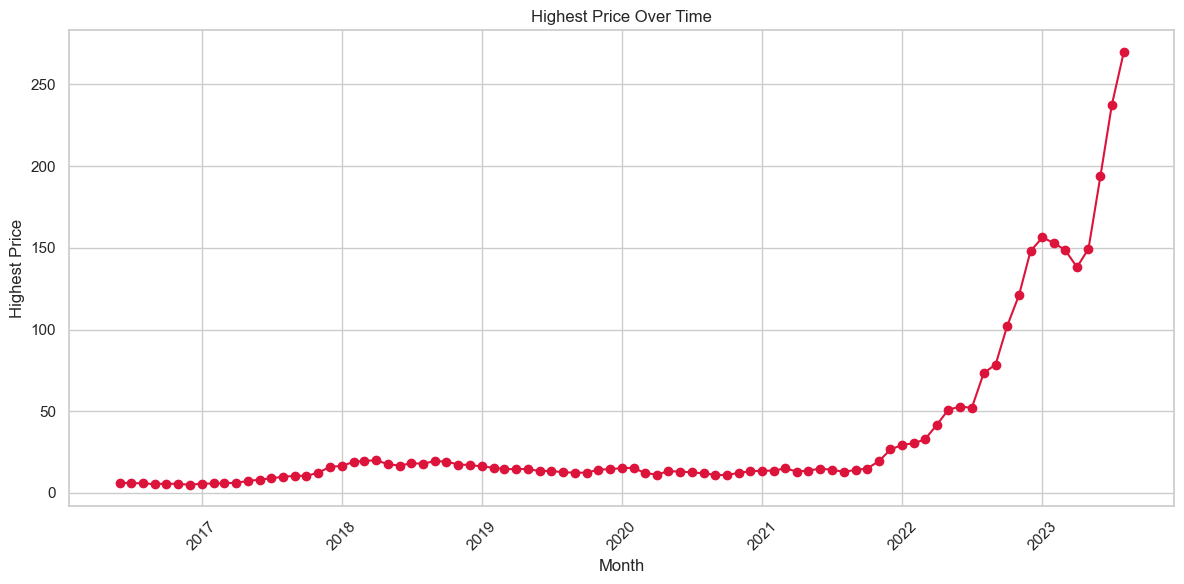

In [6]:
# Plot the 'Highest Price' over time
plt.plot(df["Month"], df["Highest Price"], marker="o", color="crimson")
plt.title("Highest Price Over Time")
plt.xlabel("Month")
plt.ylabel("Highest Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Distribution of Numerical Features

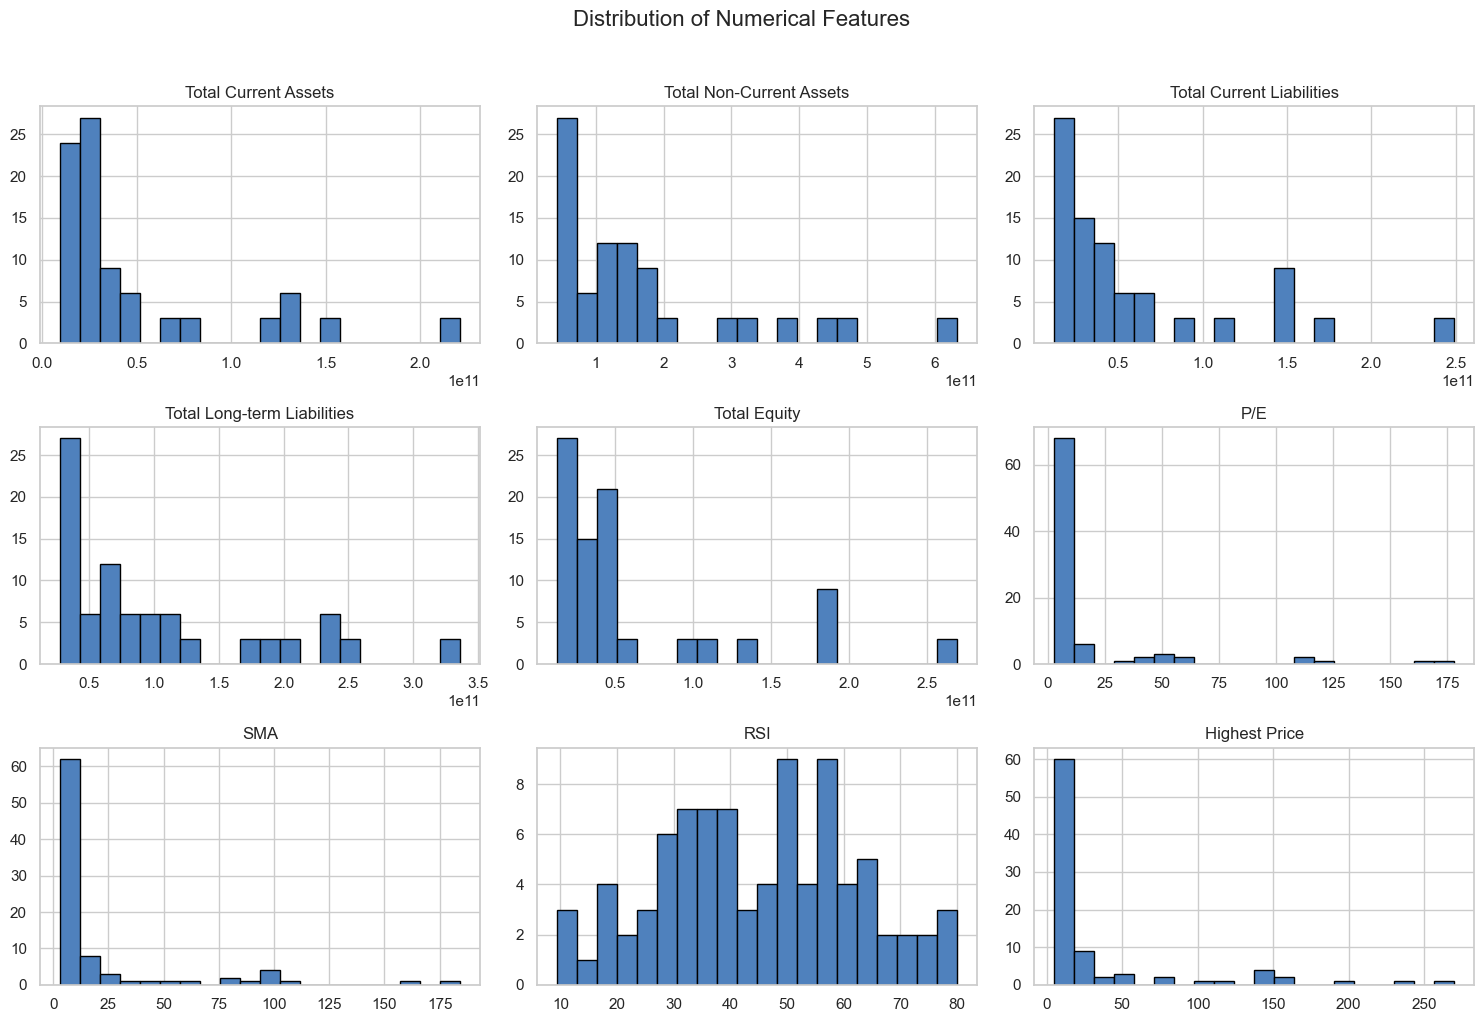

In [7]:
# Drop the 'Month' column for numeric analysis
df_numeric = df.drop(columns=["Month"])

# Plot histograms for all numeric features
df_numeric.hist(bins=20, figsize=(15, 10), edgecolor='black', color='#4F81BD')
plt.suptitle('Distribution of Numerical Features', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## 6. Correlation Analysis

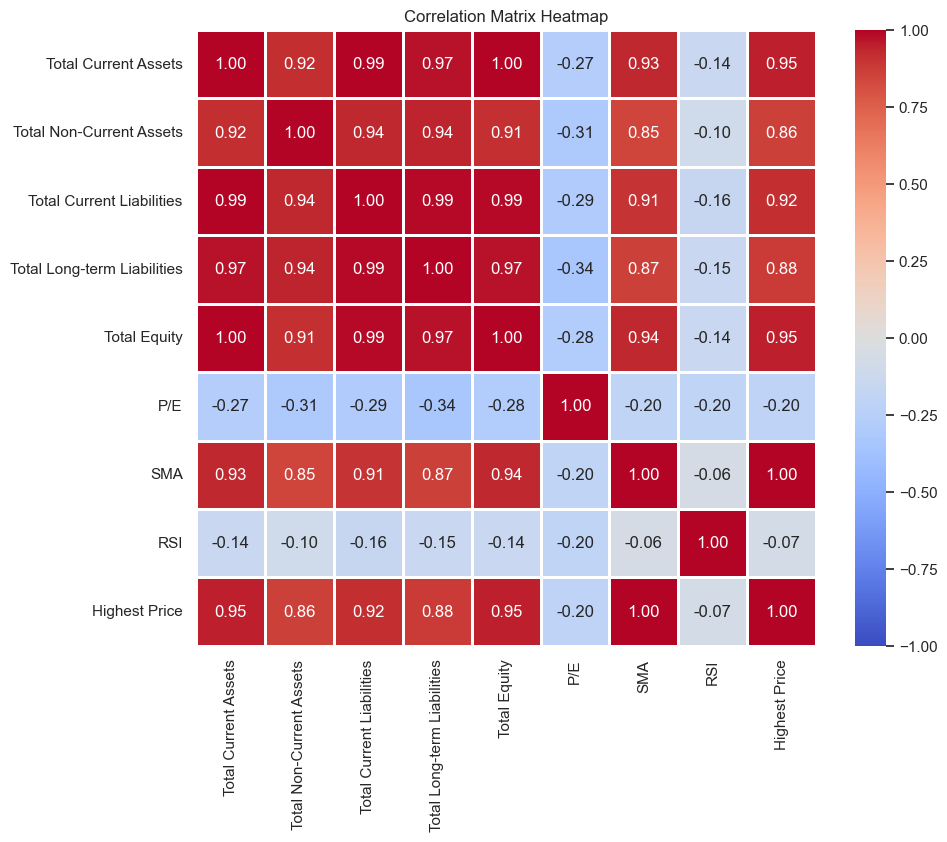

In [8]:
# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1, vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

### Correlation with Target Variable (`Highest Price`)

In [9]:
# Show correlation of all features with 'Highest Price'
corr_with_target = corr_matrix["Highest Price"].sort_values(ascending=False)
print(corr_with_target)

Highest Price                  1.000000
SMA                            0.997417
Total Current Assets           0.946750
Total Equity                   0.946367
Total Current Liabilities      0.917680
Total Long-term Liabilities    0.878320
Total Non-Current Assets       0.863931
RSI                           -0.073733
P/E                           -0.204361
Name: Highest Price, dtype: float64


## 7. SMA vs. Highest Price

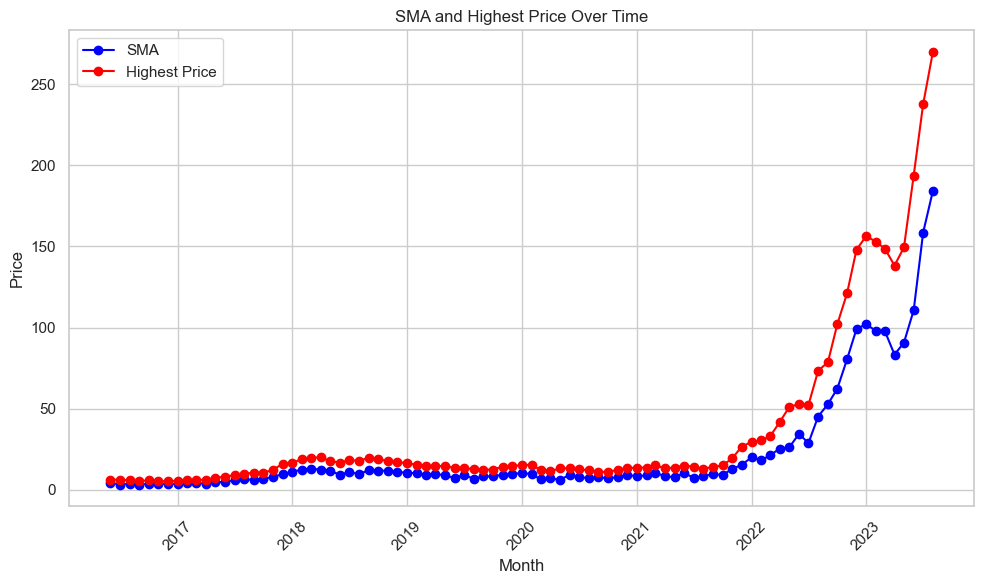

In [10]:
# Plot SMA and Highest Price together for comparison
plt.figure(figsize=(10, 6))
plt.plot(df["Month"], df["SMA"], label="SMA", color="blue", marker="o")
plt.plot(df["Month"], df["Highest Price"], label="Highest Price", color="red", marker="o")
plt.title("SMA and Highest Price Over Time")
plt.xlabel("Month")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 8. Outlier Detection: Boxplots

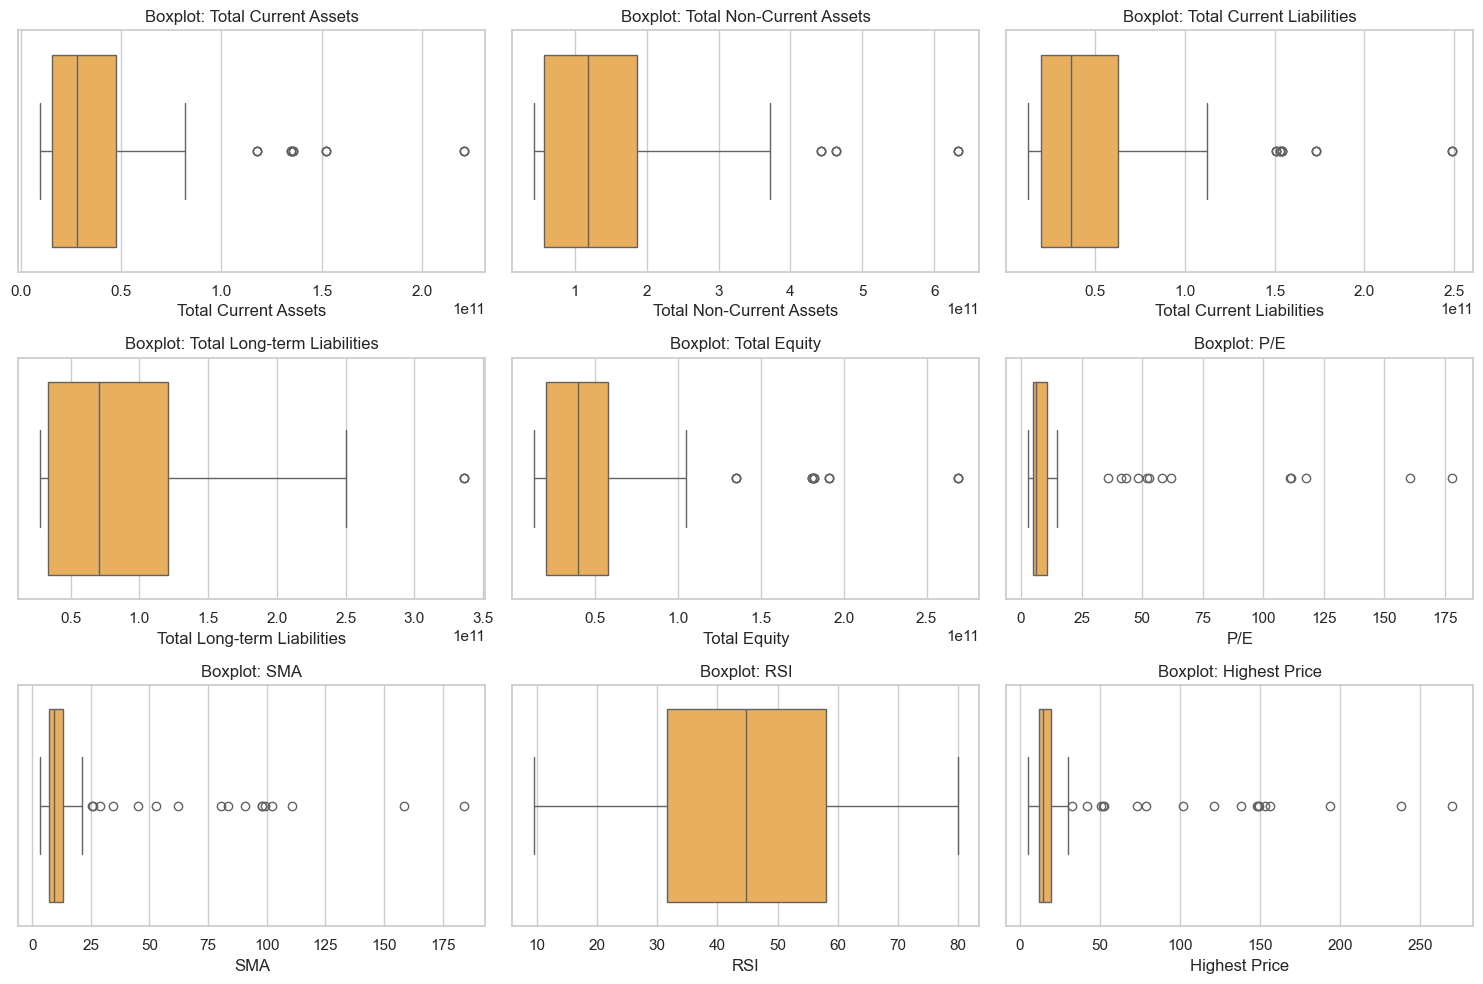

In [11]:
# Create boxplots for each numeric feature to detect outliers and spread
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_numeric.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[column], color='#FFB347')
    plt.title(f"Boxplot: {column}")
plt.tight_layout()
plt.show()

## 9. Pairwise Relationships

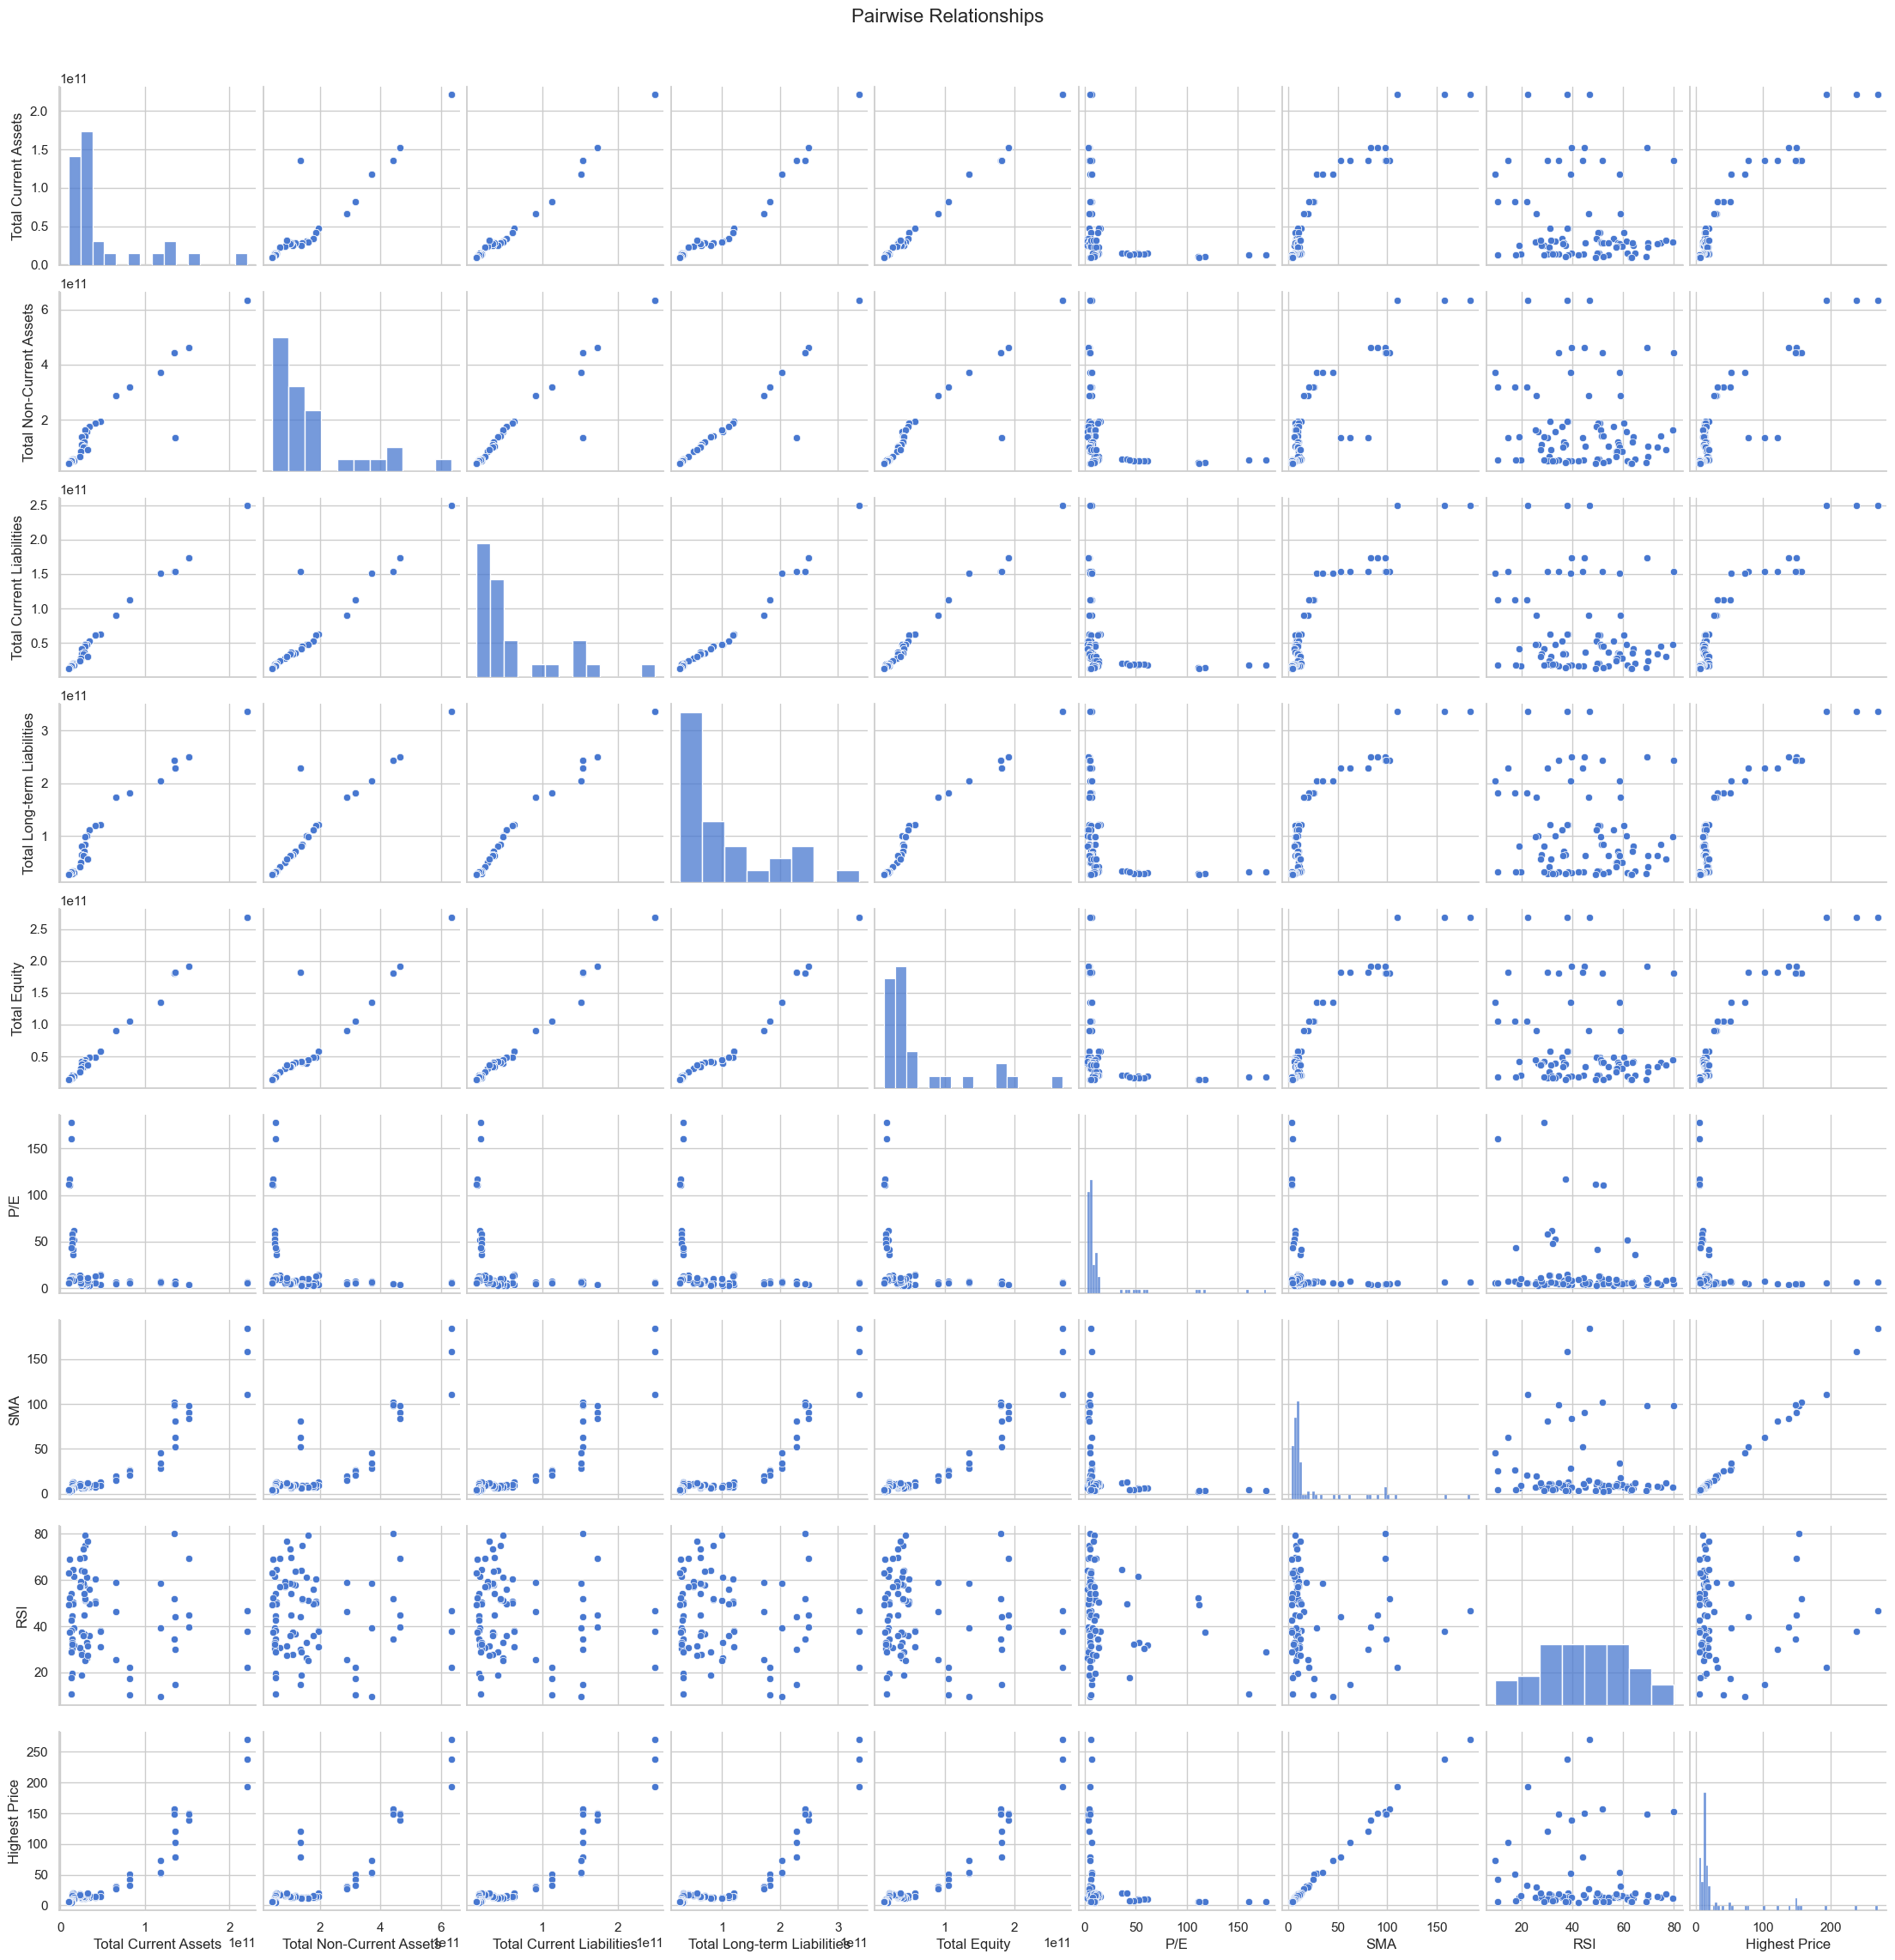

In [12]:
# Visualize pairwise relationships and distributions between features
sns.pairplot(df_numeric)
plt.suptitle('Pairwise Relationships', fontsize=16, y=1.02)
plt.show()

## 10. Feature Trends Over Time

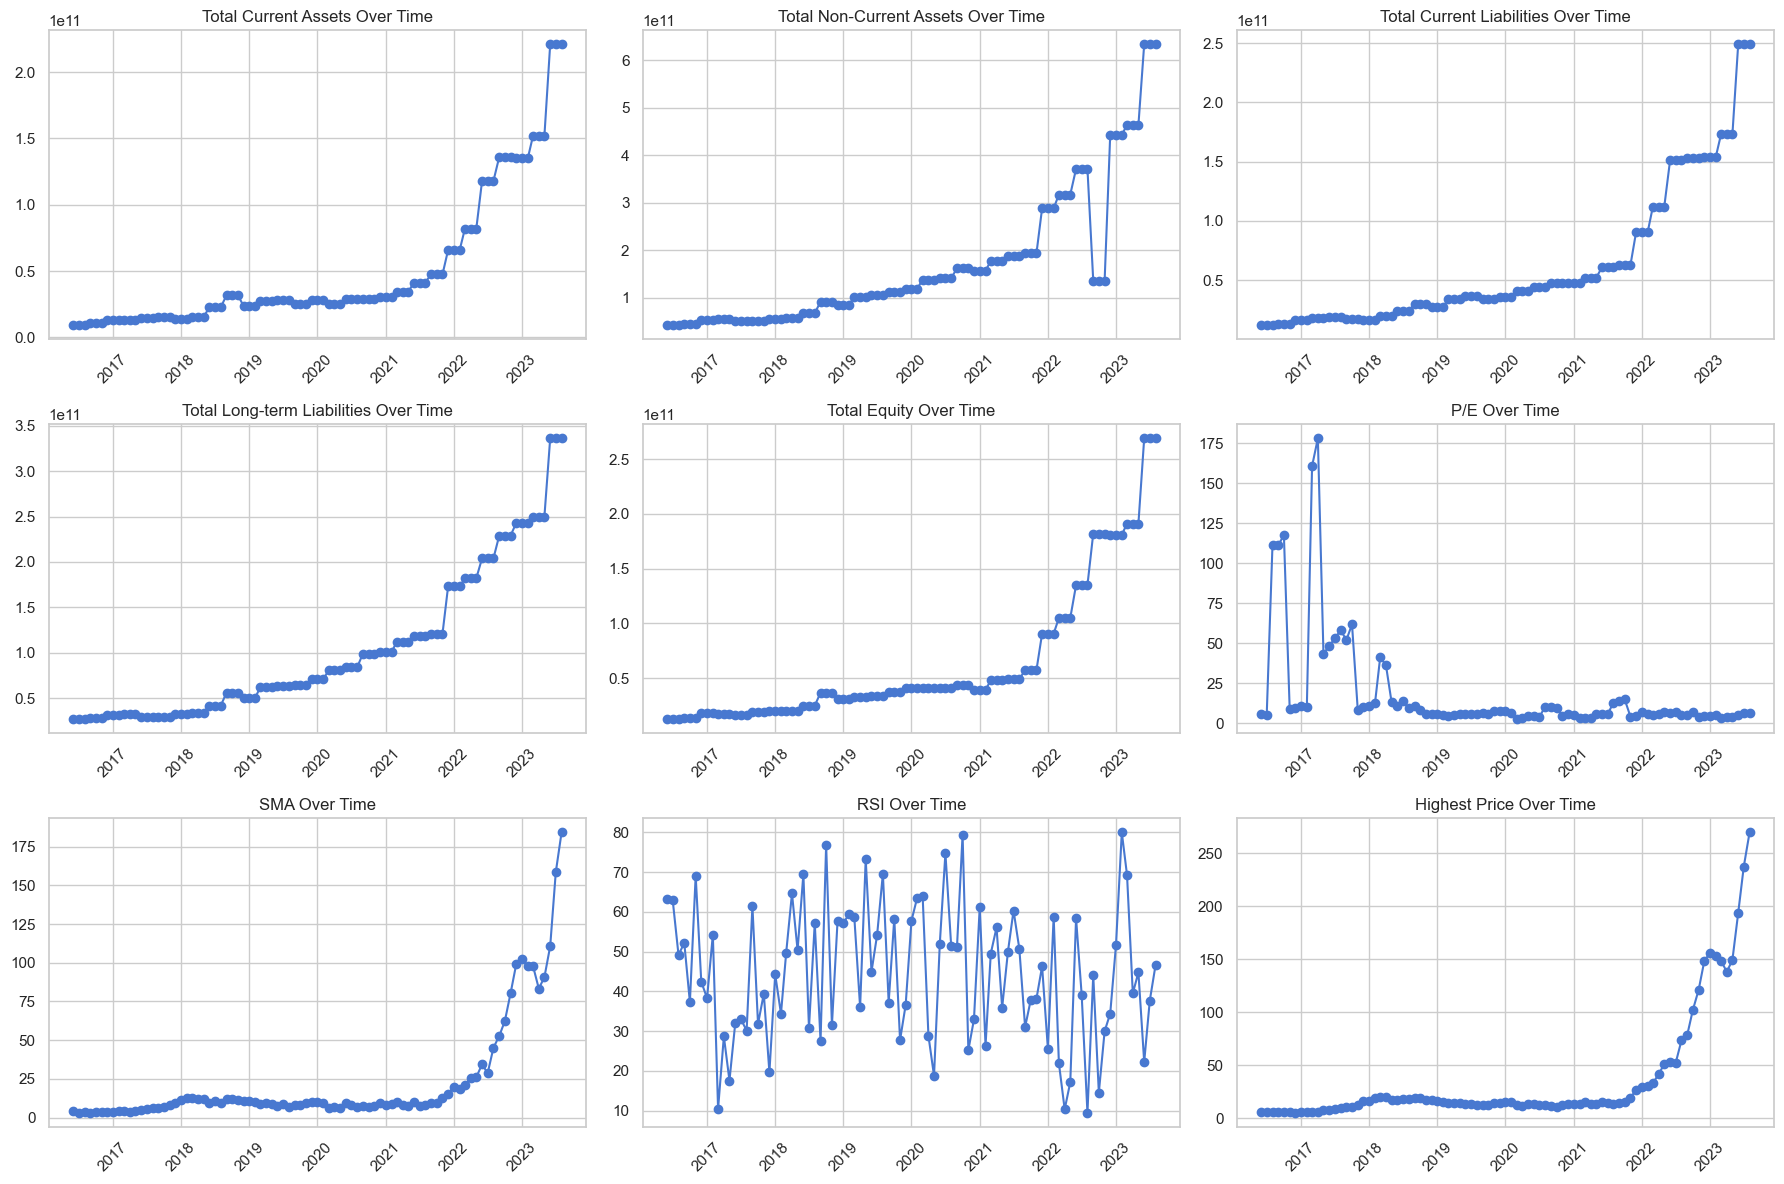

In [13]:
# Plot each numeric feature's change over time for trend analysis
plt.figure(figsize=(18, 12))
for i, column in enumerate(df_numeric.columns):
    plt.subplot(3, 3, i+1)
    plt.plot(df["Month"], df[column], marker="o")
    plt.title(f"{column} Over Time")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 11. Insights and Interpretation

### 🔎 Key Insights from EDA for Modeling & Preprocessing

- **Missing Values:** No missing values detected in the dataset (`df.info()`), so no imputation is required.
- **Feature Types:** All columns are correctly typed; the `Month` column has been converted to datetime, enabling time series analysis.
- **Target Distribution:** The `Highest Price` variable appears to be continuous and reasonably distributed, suitable for regression modeling.
- **Correlations:**
    - Features such as `SMA` and possibly others show strong positive correlation with `Highest Price`, making them valuable predictors.
    - Some features have weak or negative correlations with the target and may be less useful for modeling.
- **Outliers:** Boxplots reveal the presence of outliers in several features. Consider robust scaling or outlier handling techniques during preprocessing.
- **Feature Distributions:** Most numeric features are not heavily skewed, but check for skewness before modeling; apply transformations if necessary.
- **Temporal Trends:** Both `SMA` and `Highest Price` exhibit clear trends over time, suggesting that time-based features or lagged variables could improve model performance.
- **Multicollinearity:** The correlation matrix indicates some features are highly correlated with each other (e.g., `SMA` and `Highest Price`). Consider regularization or feature selection to address multicollinearity.
- **No Categorical Variables:** All features are numeric or datetime, so no encoding is required.

> These insights should guide feature selection, preprocessing (e.g., scaling, outlier handling), and model choice in the next steps.